# Project 1: Data Exploration and Processing of the Student Dropout Dataset from Kaggle


## Introduction
https://www.kaggle.com/code/codecavalier/student-dropout-analysis-prediction-eda
This notebook is designed to guide you through a detailed exploration and processing of the Iris dataset for Project 1. You will analyze three specific features in depth, apply encoding techniques, explore data normalization, and examine feature correlations.

## Import Necessary Libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as mpatches
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler


## Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
filepath = '/content/drive/MyDrive/CSC411/student_dropout.csv'
import pandas as pd

df = pd.read_csv(filepath)
df.head()


Mounted at /content/drive/


,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

## Data Exploration
### Analyze A Specific Feature
Analyze at least 3 different features (here only one feature has been selected)



In [ ]:
# Subset for female students
female_students = df[df['Gender'] == 'F']

# Subset for male students
male_students = df[df['Gender'] == 'M']

# Subset for students aged 18-20
young_students = df[(df['Age'] >= 18) & (df['Age'] <= 20)]

# Subset for alchoholics
alcoholics = df[(df['Weekday_Alcohol_Consumption'] >= 3) | (df['Weekend_Alcohol_Consumption'] >= 3)]

In [ ]:
avg_absences_male = male_students['Number_of_Absences'].mean()
avg_absences_female = female_students['Number_of_Absences'].mean()

print(f"Average absences for males: {avg_absences_male:.2f}")
print(f"Average absences for females: {avg_absences_female:.2f}") #the .2f is a cool trick to stop the number at 100 place on decimals!


Average absences for males: 3.78
Average absences for females: 3.58


In [ ]:
avg_alchoholic_male = male_students['Weekday_Alcohol_Consumption'].mean()
avg_alchoholic_female = female_students['Weekday_Alcohol_Consumption'].mean()

print(f"Average weekday alcohol consumption for males: {avg_alchoholic_male:.2f}")
print(f"Average weekday alcohol consumption for females: {avg_alchoholic_female:.2f}")

Average weekday alcohol consumption for males: 2.77
Average weekday alcohol consumption for females: 1.94


In [ ]:
dropout_rate_male = male_students['Dropped_Out'].mean()
dropout_rate_female = female_students['Dropped_Out'].mean()

print(f"Dropout rate for males: {dropout_rate_male:.2f}")
print(f"Dropout rate for females: {dropout_rate_female:.2f}")

Dropout rate for males: 0.19
Dropout rate for females: 0.13


In [ ]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(male_students['Number_of_Absences'], female_students['Number_of_Absences'])
print(f"T-statistic for absences: {t_stat:.2f}")
print(f"P-value for absences: {p_value:.3f}")

t_stat, p_value = stats.ttest_ind(male_students['Dropped_Out'], female_students['Dropped_Out'])
print(f"T-statistic for dropout: {t_stat:.2f}")
print(f"P-value for dropout: {p_value:.3f}")

T-statistic for absences: 0.54
P-value for absences: 0.587
T-statistic for dropout: 2.00
P-value for dropout: 0.046


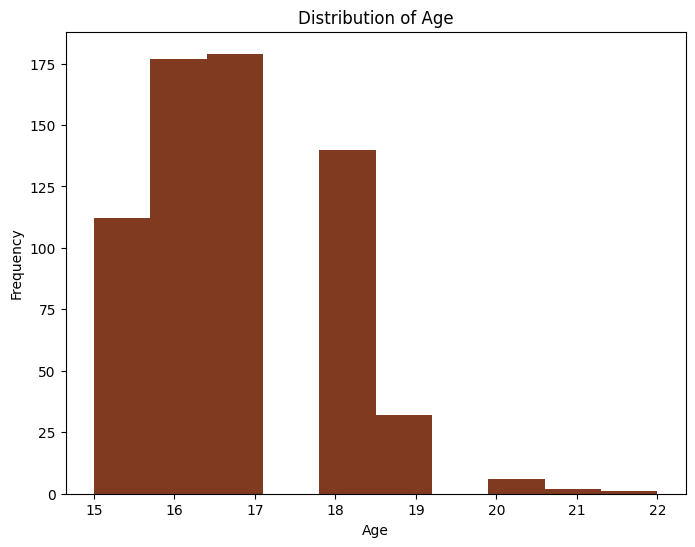

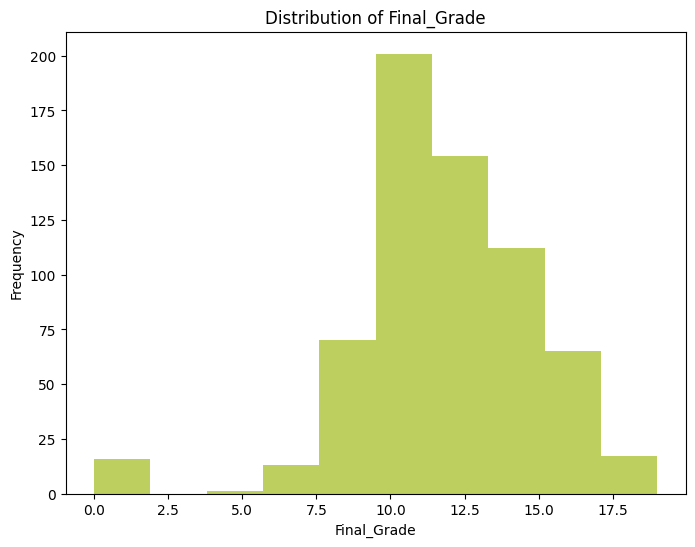

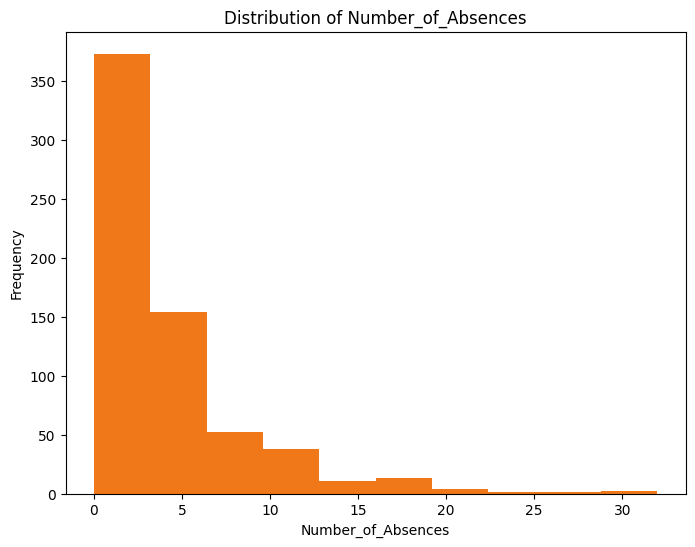

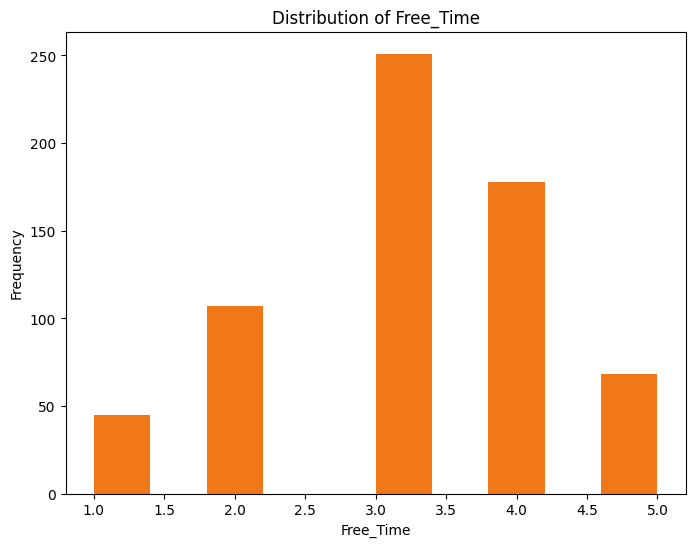

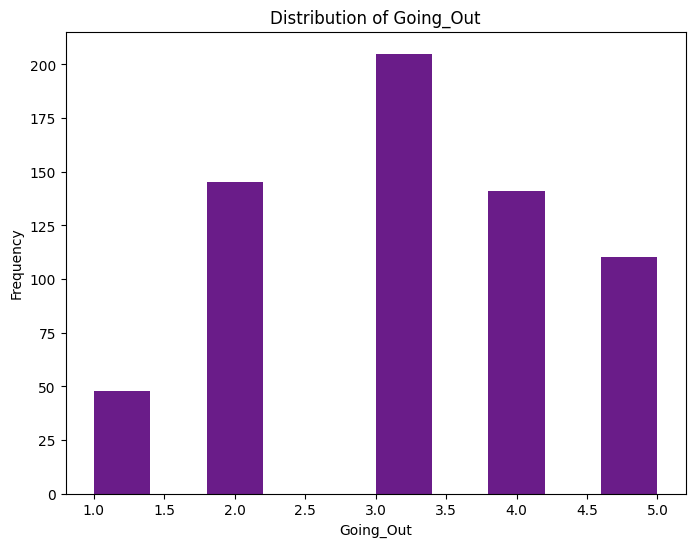

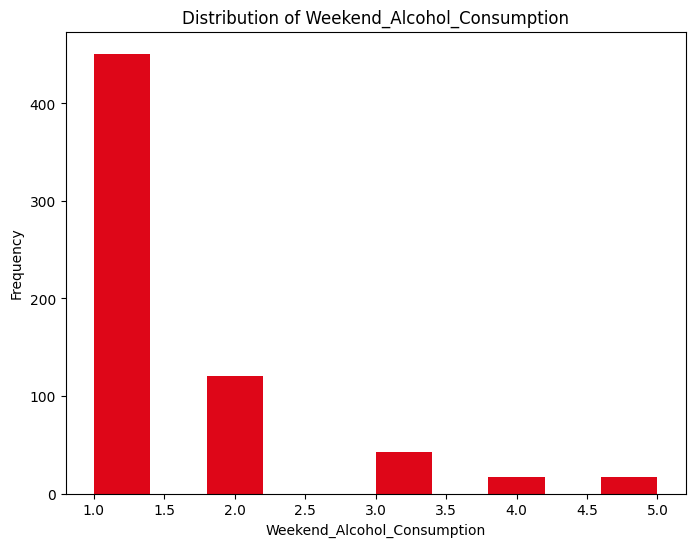

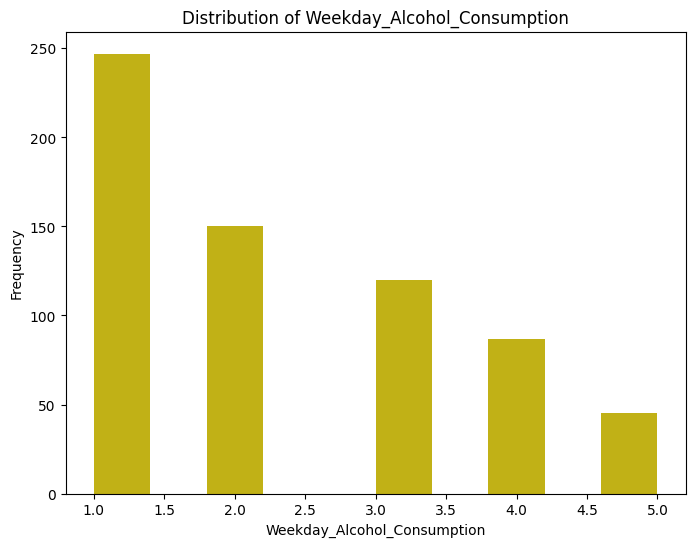

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

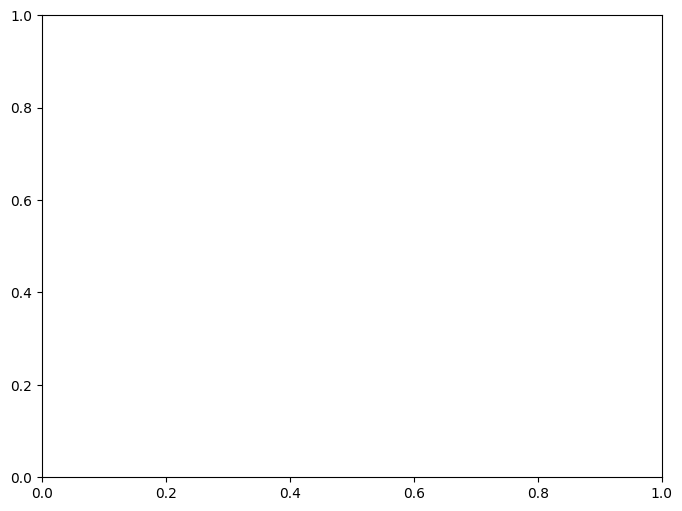

In [ ]:
# Select the features you want to analyze
features = ['Age', 'Final_Grade', 'Number_of_Absences','Free_Time','Going_Out','Weekend_Alcohol_Consumption','Weekday_Alcohol_Consumption','Dropped_Out']

# Create histograms for the selected features with different colors
colors = ['#7f3a20', '#bdcf5f', '#f07819','#f07819','#6a1c89','#de0618','#c1b116','#c15b16']  # Choose your desired colors
for i, feature in enumerate(features):
  plt.figure(figsize=(8, 6))
  plt.hist(df[feature], bins=10, color=colors[i])  # Adjust the number of bins as needed
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

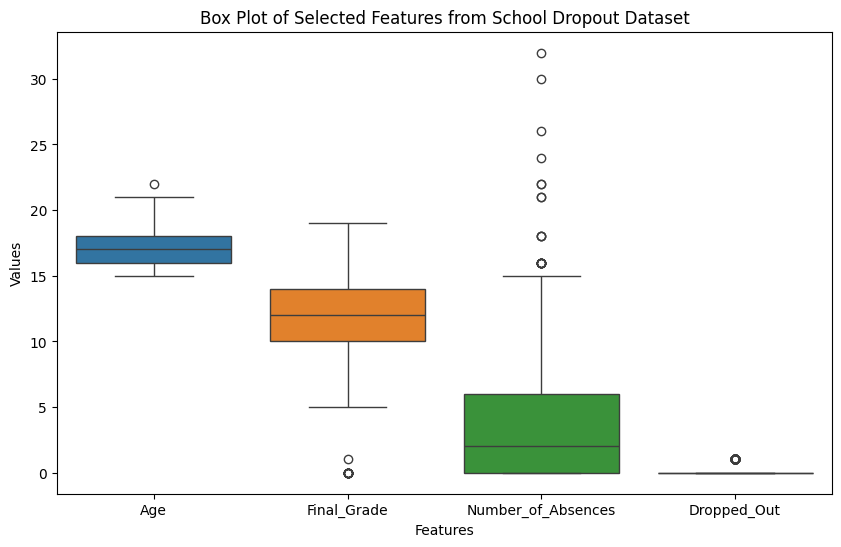

In [ ]:
# Select the features for the boxplot
bp_features = ['Age', 'Final_Grade', 'Number_of_Absences','Dropped_Out']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[bp_features])
plt.title('Box Plot of Selected Features from School Dropout Dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

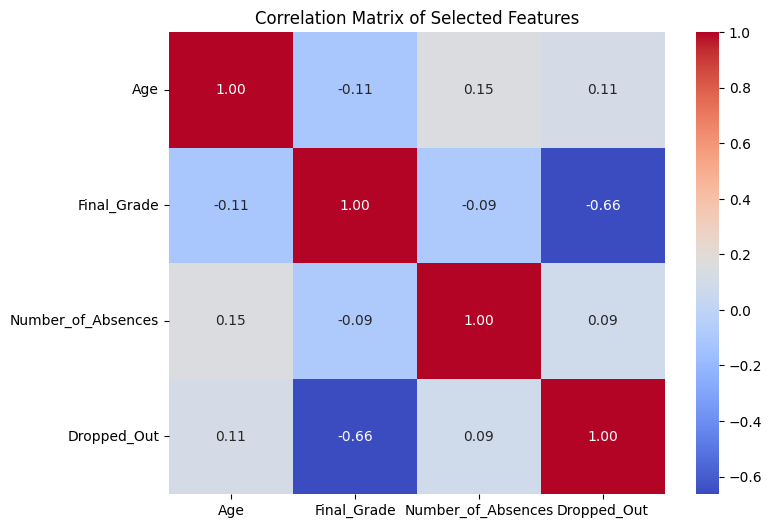

In [ ]:
# Select the features for the correlation matrix
features = ['Age', 'Final_Grade', 'Number_of_Absences','Dropped_Out']

# Calculate the correlation matrix
correlation_matrix = df[features].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='In_Relationship', data=df)
plt.title('Distribution of In_Relationship')
plt.xlabel('In_Relationship')
plt.ylabel('Count')
plt.show()

In [ ]:
# make bar chart that displays counts, understand distribution of data
sns.countplot(x='In_Relationship', hue='Gender', data=df)
plt.title('Dropout Rate by In_Relationship Status')
plt.xlabel('In_Relationship')
plt.ylabel('Count')
plt.show()

In [ ]:
# make bar chart that displays counts, understand distribution of data
sns.countplot(x='In_Relationship', hue='School', data=df)
plt.title('Dropout Rate by In_Relationship Status')
plt.xlabel('In_Relationship')
plt.ylabel('Count')
plt.show()
# I do not know what GP and MS mean even after a bit of research

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Number_of_Absences'], df['Dropped_Out'], normalize='all')

# Create the heatmap
# each cell in heatmap represents a combination of absense range and and dropout status
# darker color means more positive correlation
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Dropout Rate vs Number of Absences')
plt.xlabel('Dropout Status')
plt.ylabel('Number of Absences')
plt.show()
#shows no strong correlaiton between dropout rate and number of absenses

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Number_of_Absences'], df['Final_Grade'], normalize='all')

# Create the heatmap
# each cell in heatmap represents a combination of absense range and and dropout status
# darker color means more positive correlation
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Final Grade vs Number of Absences')
plt.xlabel('Final Grade')
plt.ylabel('Number of Absences')
plt.show()

### Detailed Analysis
Provide a detailed analysis of each selected variable in this section.

I made three histograms showing frequency of appearance in the dataset. From the histogram on age, I can see that this data set surveyed more students between the ages of 15- 17 years old than any other age bracket. Secondarily, I looked at Frequency of final grades, which were distributed in higher ranges, showing that the surveyed students from each school had high grades moe frequently. The number of Absences was also taken into consideration with another histogram. This third histogram shows that there was a lower frequency of absences among students surveyed. I got help from Gemini AI to make the histograms all different colors.
Later to the features, I added alchohol consumption and Drop out frequency as well to compare this.
I could also look at frequency of men and women compared in the study I suppose? That's a category in gender feature though, so perhaps I should use a countplot.
I used a countplot to look at gender and relationship data, trying to see if there was any comparison to be made there. I would maybe make a correlation matrix for this in the future. I cannot make a correlation matrix with it as is bc In_Relationship is an object or string dtype.
I made a boxplot looking at features like 'Age', 'Final_Grade', 'Number_of_Absences','Dropped_Out', in order to see if these fell on certain levels with one another to show relationships between these features. I did not find any crazy relationships and did a correlation matrix to see, maybe showing that absences did correlate a bit.



## Feature Encoding
Discuss and apply one-hot encoding vs. ordinal encoding. Identify which features should be encoded in which way.

One hot encoding is good for avoiding heirarchical order amoung catergories. There is no inherent order between categories with parents jobs, or in this case we don't want there to be.
Ordinal encoding assigns integers to each category in a categorical feature that has to be placed in some sort of order. This can mess with the model if you don't want a heiarchy. I used an example of ordinal encoding to place a integer on the feature In_Realtionship.


In [ ]:
# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['Mother_Job']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Mother_Job']))
data_encoded = pd.concat([df.drop('Mother_Job', axis=1), encoded_df], axis=1)
print(data_encoded.head())

  School Gender  Age Address Family_Size Parental_Status  Mother_Education  \
0     GP      F   18       U         GT3               A                 4   
1     GP      F   17       U         GT3               T                 1   
2     GP      F   15       U         LE3               T                 1   
3     GP      F   15       U         GT3               T                 4   
4     GP      F   16       U         GT3               T                 3   

   Father_Education Father_Job Reason_for_Choosing_School  ...  \
0                 4    teacher                     course  ...   
1                 1      other                     course  ...   
2                 1      other                      other  ...   
3                 2   services                       home  ...   
4                 3      other                       home  ...   

  Number_of_Absences  Grade_1  Grade_2  Final_Grade Dropped_Out  \
0                  4        0       11           11       False   


## Normalization
Normalize the 'sepal_length' feature using Min-Max Scaling and Standard Scaling.

In [ ]:
# Normalization using Min-Max Scaling
scaler_min_max = MinMaxScaler()
#Corrected the spelling from 'Number_of_Absenses' to 'Number_of_Absences'
df['Number_of_Absences_normalized'] = scaler_min_max.fit_transform(df[['Number_of_Absences']])
print("Min-Max Normalized:")
print(df[['Number_of_Absences', 'Number_of_Absences_normalized']].head())

# Standardization using Standard Scaler
scaler_standard = StandardScaler()
df['Number_of_Absences_standardized'] = scaler_standard.fit_transform(df[['Number_of_Absences']])
print("Standard Normalized:")
#Corrected the spelling from 'Number_of_Absenses' to 'Number_of_Absences'
print(df[['Number_of_Absences', 'Number_of_Absences_normalized']].head())

NameError: name 'MinMaxScaler' is not defined

## Correlation Analysis
Study the correlation of each feature using pair plots.

In [ ]:
# Select the features you want to include in the pair plot
features = ['Number_of_Absences','Study_Time','Travel_Time','Number_of_Failures','Age','Dropped_Out',]

# Create the pair plot
sns.pairplot(df[features])
plt.show()

## Handling Special Cases in Data
Discuss handling zip code as a categorical or numerical feature.
Zip codes in any data set should be treated as catergorical values in order to not place order on them. Zip codes also tags, not numerical features that can be added or subtracted from one another. They have a distinction to make in order to categorize areas or regions from one another.

## Reflection
Reflect on the learning from this project, challenges faced, and insights gained.

Oh my goodness, I loved this. I learned so much from trying new things in this dataset. I found it super interesting on what features were even available in the data set, and used code from Kaggle as well as Youtube resources, CSC 219 lectures, and AI to explore different graphs outside of histograms and boxplots. I think if I were to do this over, I would add another category for other types of drugs. I definitely want to look at this data more by tranforming some of the datatypes, when I have more time and comparing those to one another. I am convinced that being in a relationship in school is somehow correlated with worse grades, so I need to make both of those things int64 soon and see! I still do not understamnd one hot encoding in the way that It can be useful. For this dataset I used Mother_Jobs to see if having an employed mother impacted drop out rates and learned that it doesn't really from the amount of data I looked at. There is so much more to be learned from this and I really enjoyed the amount I got to do for this assignment !
